# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Getting started with RDKit

RDKit is an Open-Source Chem(o)informatics and Machine Learning Library that supports C++ and Python. It implements many features, that you have learned about in the lecture. Find more informations here: https://www.rdkit.org/docs/GettingStartedInPython.html

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, SimilarityMaps
from rdkit.Chem import AllChem, Draw
import pandas as pd
from hints import hint

Here is an example showcasing how a molecule can be read in from a SMILES and represented in Python.

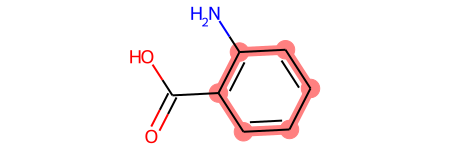

In [3]:
mol = Chem.MolFromSmiles('c1cc(C(=O)O)c(N)cc1')
mol.__sssAtoms = [0, 1, 2, 6, 8, 9]
mol

The similarity of two molecules can quickly be visualized using Fingerprints and SimilarityMaps.

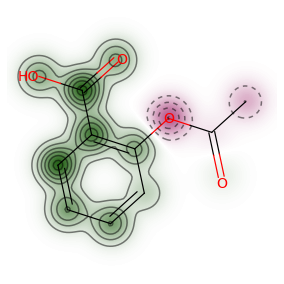

In [4]:
mol2 = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mol, mol2, SimilarityMaps.GetMorganFingerprint, size=(150, 150))

## Loading data

We are able to import a molecule in different ways: either as smiles or as a '.mol' file. Try it with a smiles of your choice. And let python draw the molecule. Does it look like you expect it?

For hints to each command line you can write `hint("comm_1.1")` and so forth. There are usually 3 hints called "comm_1.1", "comm_1.2" and "comm_1.3" or more if specified.

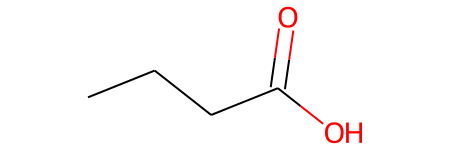

In [5]:
# hint("comm_1.1")
# hint("comm_1.2")
# hint("comm_1.3")

mol3 = Chem.MolFromSmiles('CCCC(=O)O')
mol3

Nevertheless, we can also convert a molecule to a smiles. Try to convert different versions of smiles to a molecule and then back to smiles again.

In [6]:
mol4 = Chem.MolFromSmiles('OC(=O)CCC')
mol4
smiles1 = Chem.MolToSmiles(mol4)
print(smiles1)

CCCC(=O)O


Q: What do you witness when transforming back and forth between smiles - mol - smiles?

When transforming from a molecul to smiles notation, the RDkit always used the standardized notation

But it would be really annoying, if we would have to load every molecule one by one. However, we can bypass this issue with our good friend `pandas`. Give it a try with the 'drug.smi' file and try to visualize each smiles.

In [7]:
smilesCollection = pd.read_csv('drugs.smi')
# for i in smilesCollection['smiles']:
#     mol_i = Chem.MolFromSmiles(i)
#     print(repr(mol_i))
smilesCollection['images'] = smilesCollection['smiles'].apply(Chem.MolFromSmiles)
smilesCollection

,Unnamed: 0,name,smiles,images
0,0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4cd0e40>
1,1,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4cbf670>
2,2,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4cc3620>
3,3,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4cc3760>
4,4,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4cc35d0>
...,...,...,...,...
9075,9075,Magnesium acetate,[Mg++].CC([O-])=O.CC([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42af9e0>
9076,9076,Baloxavir marboxil,[H][C@@]12COCCN1C(=O)C1=C(OCOC(=O)OC)C(=O)C=CN...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42afa30>
9077,9077,Tetraglyme,COCCOCCOCCOCCOC,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42afa80>
9078,9078,alpha-Tocopherol succinate,[H][C@@](C)(CCCC(C)C)CCC[C@@]([H])(C)CCC[C@]1(...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42afad0>


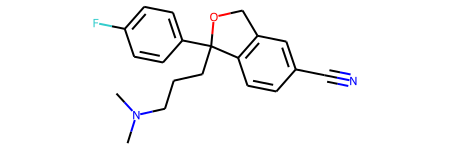

In [8]:
#smilesCollection.loc[109, 'images']
smilesCollection['images'][109]

## Substructure search

To be able to look for common substructures you first have to define a suitable substructure. Give it a try and represent possible templates as smiles and structures.

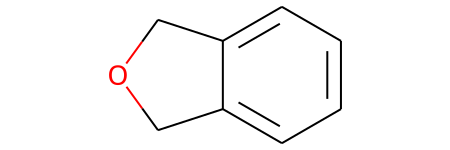

In [9]:
# hint("comm_3.1")
# hint("comm_3.2")
# hint("comm_3.3")

substructSmiles = 'c12ccccc1COC2'
substruct = Chem.MolFromSmiles(substructSmiles)
substruct

### Exercise:

_1)_ Try to find out how many structures in 'drug.smi' have an amide. How many of the molecules have a pteridin? Visualize all molecules that have __both__ of these substructures and show the names.

In [17]:
# hint("comm_4.1")
# hint("comm_4.2")
# hint("comm_4.3")
# hint("comm_4.4")

#amide2 = Chem.MolFromSmiles('*C(=O)N(*)*')
amide = Chem.MolFromSmiles('C(=O)N')
amide
pteridin = Chem.MolFromSmiles('c12nccnc1ncnc2')

def hasAmide(molecule):
    return molecule.HasSubstructMatch(amide)

def hasPteridin(molecule):
    return molecule.HasSubstructMatch(pteridin)
 
smilesCollection['amide'] = smilesCollection['images'].apply(hasAmide)
smilesCollection['pteridin'] = smilesCollection['images'].apply(hasPteridin)
#smilesCollection['images'].apply()
#map(GetSubstructMatches(amide), smilesCollection['images'])
#sucrose_mol.GetSubstructMatches(secondary_alcohol))
#names = ... # list containing the names of the matches
names = []
for i in range(len(smilesCollection)):
    if smilesCollection['amide'][i] == True and smilesCollection['pteridin'][i] == True:
        names.append(smilesCollection['name'][i])
    else:
        None


,Unnamed: 0,name,smiles,images,amide,pteridin
53,53,Folic Acid,NC1=NC(=O)C2=NC(CNC3=CC=C(C=C3)C(=O)N[C@@H](CC...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42fb300>,True,True
448,448,Methotrexate,CN(CC1=CN=C2N=C(N)N=C(N)C2=N1)C1=CC=C(C=C1)C(=...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4303170>,True,True
4767,4767,Talotrexin,[H][C@@](CCCN=C(O)C1=CC=CC=C1C(O)=O)(NC(=O)C1=...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42d9760>,True,True
5088,5088,Pralatrexate,NC1=NC2=NC=C(CC(CC#C)C3=CC=C(C=C3)C(=O)N[C@@H]...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42dfdf0>,True,True
5939,5939,"METHYL 1-(4-{[(2,4-DIAMINOPTERIDIN-6-YL)METHYL...",COC(=O)C1CCN(CC1)C(=O)C1=CC=C(NCC2=NC3=C(N=C2)...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42f0e40>,True,True
6009,6009,"METHYL 1-(4-{[(2,4-DIAMINOPTERIDIN-6-YL)METHYL...",COC(=O)C1CCN(CC1)C(=O)C1=CC=C(C=C1)N(C)CC1=NC2...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42f24e0>,True,True
7053,7053,Aminopterin,NC1=NC2=C(N=C(CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4287300>,True,True
8425,8425,EC-17,NC(=O)CC[C@H](N(CCNC(=S)NC1=CC=C2C(=C1)C(=O)OC...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42a29e0>,True,True


In [92]:
assert 'Aminopterin' in names
assert 'Folic Acid' in names

_2)_ What is the largest common substructure of the now identified molecules (`from rdkit.Chem import rdFMCS`)? Differ between 'naive largest substructure' and substructures with complete rings (`ringMatchesRingOnly`).

In [19]:
foundStructures = smilesCollection[smilesCollection['name'].isin(names)]
foundStructures

,Unnamed: 0,name,smiles,images,amide,pteridin
53,53,Folic Acid,NC1=NC(=O)C2=NC(CNC3=CC=C(C=C3)C(=O)N[C@@H](CC...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42fb300>,True,True
448,448,Methotrexate,CN(CC1=CN=C2N=C(N)N=C(N)C2=N1)C1=CC=C(C=C1)C(=...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4303170>,True,True
4767,4767,Talotrexin,[H][C@@](CCCN=C(O)C1=CC=CC=C1C(O)=O)(NC(=O)C1=...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42d9760>,True,True
5088,5088,Pralatrexate,NC1=NC2=NC=C(CC(CC#C)C3=CC=C(C=C3)C(=O)N[C@@H]...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42dfdf0>,True,True
5939,5939,"METHYL 1-(4-{[(2,4-DIAMINOPTERIDIN-6-YL)METHYL...",COC(=O)C1CCN(CC1)C(=O)C1=CC=C(NCC2=NC3=C(N=C2)...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42f0e40>,True,True
6009,6009,"METHYL 1-(4-{[(2,4-DIAMINOPTERIDIN-6-YL)METHYL...",COC(=O)C1CCN(CC1)C(=O)C1=CC=C(C=C1)N(C)CC1=NC2...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42f24e0>,True,True
7053,7053,Aminopterin,NC1=NC2=C(N=C(CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef4287300>,True,True
8425,8425,EC-17,NC(=O)CC[C@H](N(CCNC(=S)NC1=CC=C2C(=C1)C(=O)OC...,<rdkit.Chem.rdchem.Mol object at 0x7f2ef42a29e0>,True,True


With 'FindMCS' you can determine the largest substructure of the values of your new defined list.
Over smarts you can get to a visualization. Have for that a closer look at the RDKit documentation.


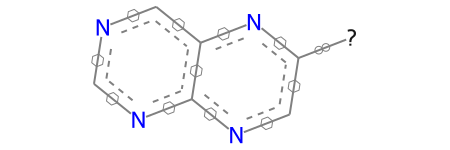

In [47]:
hint("comm_5.1")
hint("comm_5.2")

from rdkit.Chem import rdFMCS
substructureSMARTS1 = rdFMCS.FindMCS(foundStructures['images'].values)
substructure1 = Chem.MolFromSmarts(substructureSMARTS.smartsString)
substructureSMARTS2 = rdFMCS.FindMCS(foundStructures['images'].values, ringMatchesRingOnly=True)
substructure2 = Chem.MolFromSmarts(substructureSMARTS2.smartsString)
substructure2

Q: What is the largest common Substructure?

YOUR ANSWER HERE